# <center>Rozwiązywanie układów równań</center>

Instrukcja:
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi (w postaci kodu) z komentarzami w środowisku Jupyter Notebook i umieścić je na platformie e-learningowej.   

In [1]:
import main

import numpy as np
import scipy 
import matplotlib
import matplotlib.pyplot as plt

**Cel zajęć:** Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania układów równań liniowych. To podstawowe zadanie algebry liniowej które macierzowo możemy zapisać jako:  
  
$
\mathbf{Ax}=\mathbf{b}
$ 
  
gdzie $\mathbf{A}$ - macierz współczynników, $\mathbf{x}$ - wektor zmiennych a $\mathbf{b}$ - wektor wyników prawej strony równania.  

Do oceny jakości rozwiązania będziemy wykorzystywać residuum (ang. *residual*)
$
\mathbf{r}=\mathbf{b}-\mathbf{Ax}
$ 
  

***Zadanie 1***   
 
1. Zaimplementuj funkcje *random\_matrix\_Ab* według opisu w pliku main.py generującą macierz kwadratową $\mathbf{A}$ i wektor $\mathbf{b}$ o zadanych wymiarach odpowiednio $m\times m$, $m\times 1$ i o wartościach losowych. W tym celu skorzystaj z funkcji *[randint](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.randint.html)*. W razie podania nieprawidłowej wartości m funkcja ma zwrócić wartość None.

2. Wygeneruj takie macierze dla $m=10,\ 20,\ 50,\ 100,\ 1000$. 


In [2]:
import main
import numpy as np

def random_matrix_Ab(m:int):
    if type(m) is not int or m<=0:
        return None
    A = np.random.randint(m,size = (m,m))
    b = np.random.randint(m,size = (m,1))
    return A,b


# GENERUJĘ MACIERZE DLA RÓŻNYCH WARTOŚCI m

A_list = list()
b_list = list()

for m in [10,20,50,100,1000]:
    result = random_matrix_Ab(m)
    A_list.append(result[0])
    b_list.append(result[1])

***Zadanie 2***   
 
1. Dla macierzy i wektorów wygenerowanych w poprzednim zadaniu znajdź rozwiązanie układu równań $\mathbf{Ax}=\mathbf{b}$ używając funkcji *[solve](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.solve.html?highlight=solve#numpy.linalg.solve)*. 

2. Zaimplementuj normę residual_norm zgodnie z opisem z main.py (używając *[norm](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.norm.html?highlight=norm#numpy.linalg.norm)*) sprawdź dokładność otrzymanego rozwiązania (oblicz normę residuum).

3. Określ uwarunkowanie macierzy $\mathbf{A}$ przy pomocy funkcji *[cond](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.cond.html?highlight=cond#numpy.linalg.cond)*. 

4. Odpowiedź na pytanie czy zakres wartości oraz wymiary macierzy mają wpływ na jakość otrzymanych wyników? 
  

In [3]:
import numpy.linalg as nplin
import numpy as np

# DEFINICJA FUNKCJI RESIDUAL_NORM
def residual_norm(A:np.ndarray,x:np.ndarray, b:np.ndarray):
    if type(A) is not np.ndarray and type(b) is not np.ndarray and type(x) is not np.ndarray:
        return None
    if x.size != b.size or x.size != A[0].size:
        return None
    return np.linalg.norm(A@x-b)


solutions = list()
res = list()
conds = list()
for i in range(0,len(A_list)):
    solutions.append(nplin.solve(A_list[i],b_list[i]))
    res.append(residual_norm(A_list[i],solutions[i],b_list[i]))
    conds.append(nplin.cond(A_list[i]))

ms = [10,20,50,100,1000]
for i in range(len(A_list)):
    print(f"Dla m równego {ms[i]}: \n Norma residuum: {res[i]:e} \n Współczynnik uwarunkowania: {conds[i]:.2f} \n")

Dla m równego 10: 
 Norma residuum: 1.055588e-14 
 Współczynnik uwarunkowania: 86.92 

Dla m równego 20: 
 Norma residuum: 3.190032e-14 
 Współczynnik uwarunkowania: 113.27 

Dla m równego 50: 
 Norma residuum: 4.297646e-13 
 Współczynnik uwarunkowania: 287.90 

Dla m równego 100: 
 Norma residuum: 5.160918e-12 
 Współczynnik uwarunkowania: 2862.33 

Dla m równego 1000: 
 Norma residuum: 2.303128e-08 
 Współczynnik uwarunkowania: 157694.09 



WNIOSKI: Wraz ze wzrostem wielkości macierzy oraz możliwego zakresu wartości rośnie norma residuum, oznacza to, że otrzymany przez nas wynik jest coraz gorszy, coraz bardziej odległy od prawdziwego, jednak cały czas bardzo dobry (nawet dla m = 1000 błąd jest rzędu 10^-8 a więc bardzo mały). Rośnie także współczynnik uwarunkowania, dla m równego 20 jest on jeszcze na akcptowalnym poziomie, jednak dla n = 50 jest on już bardzo duży. Wiąże się to z tym, że gdybyśmy w bardzo małym stopniu zmieli wartości macierzy A (np. odjęli od niej wartość 0.01) to x mogłyby stać się bardzo duże a nawet zespolone.

Zadanie 3
Rozkład dowolnej macierzy metodą  [dekompozycji na wartości singularne](https://pl.wikipedia.org/wiki/Rozk%C5%82ad_wed%C5%82ug_warto%C5%9Bci_osobliwych) można w Pythonie przeprowadzić przy pomocy funkcji [svd](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.svd.html). Rozkład dla przykładowej macierzy obrazuje kod:

In [4]:
import numpy as np
import numpy.linalg as nplin

A = np.array([[1,2,3],[1,2,3],[1,2,3]])

# Użycie rozkładu SVD na macierzy A
U,S,V = nplin.svd(A)

print(S)
# Odtworzenie macierzy A przy pomocy metody SVD
A2 = np.dot(U * S, V)
 
print("Macierz A:\n {0}".format(A))
print("Macierz odtworzona z SVD:\n {0}".format(A2))

[6.4807407 0.        0.       ]
Macierz A:
 [[1 2 3]
 [1 2 3]
 [1 2 3]]
Macierz odtworzona z SVD:
 [[1. 2. 3.]
 [1. 2. 3.]
 [1. 2. 3.]]


Wykonaj następujące kroki:

1. Zdefiniuj funkcję inicjalizujące wektory *wartości singularnych* w następujący sposób:
    - wektor nierosnących wartości singularnych w postaci wektora przestrzeni logarytmicznej,
    - wektor nierosnących wartości singularnych, gdzie jedna wartość jest znacznie większa od pozostałych,
    - wektor nierosnących wartości, gdzie jedna wartość jest znacznie mniejsza od pozostałych. 
    
    W celu inicjalizacji takich wektorów zaimplementuje funkcje:  
    - *log\_sing\_value* zgodnie z opisem w main.py i użyciu funkcji *[logspace](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.logspace.html?highlight=logspace#numpy.logspace)*
    - *order\_sing\_value* zgodnie z opisem w main.py

2. Zdefiniuj funkcję *create_matrix_from_A* z pliku main, która dla zadanej macierzy A z *zadania 1* i wektorów warości singularnych z punktu 1. tego zadania będzie zwracać odtworzoną macierz z podmienionym wektorem warości singularnych przy pomocy metody SVD, jak pokazanow w przykładzie wyżej. 

3. Dla otrzymanych macierzy oblicz wartości współczynnika uwarunkowania. 

4. Odpowiedz na pytanie: czy konieczne jest wyliczanie macierzy aby to zrobić?

5. Dla każdego $m$ sporządź wykres normy residuów rozwiązań i funkcji uwarunkowania macierzy. 




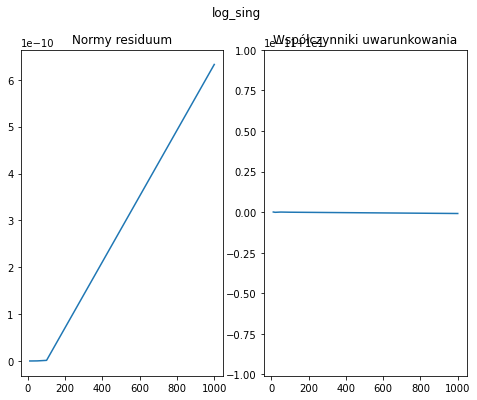

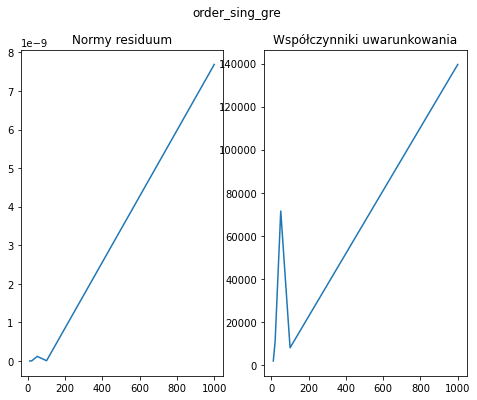

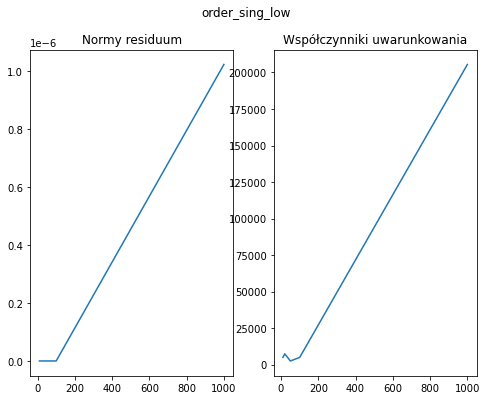

In [7]:
import main
import numpy as np
from typing import Union

# Implementacje funkcji potrzebnych do rozwiązania zadania
def log_sing_value(n:int, min_order:Union[int,float], max_order:Union[int,float]):
    if type(n) is not int or n<=0:
        return None
    if type(min_order) not in [float, int] or type(max_order) not in [float, int]:
        return None
    if min_order >= max_order:
        return None
    result = np.logspace(min_order,max_order,n)
    result = result[::-1]
    return result


def order_sing_value(n:int, order:Union[int,float] = 2, site:str = 'gre'):
    if type(n) is not int or n<=0:
        return None
    if type(order) not in [int,float]:
        return None
    result = np.random.rand(n)*10
    result = np.sort(result)
    result = result[::-1]
    if site == 'gre':
        result[0]=result[0]*10**order
        return result
    if site == 'low':
        result[-1]=result[-1]/10**order
        return result
    return None


def create_matrix_from_A(A:np.ndarray, sing_value:np.ndarray):
    if type(A) is not np.ndarray or type(sing_value) is not np.ndarray:
        return None
    if A[0].size != sing_value.size:
        return None
    U,_,V = nplin.svd(A)
    return np.dot(U * sing_value, V)

A_lst = list()
b_lst = list()
for m in [10, 20, 50, 100, 1000]:
    temp = random_matrix_Ab(m)
    A_lst.append(temp[0])
    b_lst.append(temp[1])


m = [10, 20, 50, 100, 1000]

log_sing = list()
order_sing_gre = list()
order_sing_low = list()
for i in range(len(A_lst)):
    log_sing.append(log_sing_value(m[i], 1, 2))
    order_sing_gre.append(order_sing_value(m[i], 2, 'gre'))
    order_sing_low.append(order_sing_value(m[i], 2, 'low'))

A_dif_log = list()
A_dif_gre = list()
A_dif_low = list()
for i in range(len(A_lst)):
    A_dif_log.append(create_matrix_from_A(A_lst[i], log_sing[i]))
    A_dif_gre.append(create_matrix_from_A(A_lst[i], order_sing_gre[i]))
    A_dif_low.append(create_matrix_from_A(A_lst[i], order_sing_low[i]))

solve_log = list()
solve_gre = list()
solve_low = list()

cond_log = list()
cond_gre = list()
cond_low = list()  

res_log = list()
res_gre = list()
res_low = list()  
for i in range(len(A_lst)):
    solve_log.append(np.linalg.solve(A_dif_log[i],b_lst[i]))
    solve_gre.append(np.linalg.solve(A_dif_gre[i],b_lst[i]))
    solve_low.append(np.linalg.solve(A_dif_low[i],b_lst[i]))

    cond_log.append(np.linalg.cond(A_dif_log[i]))
    cond_gre.append(np.linalg.cond(A_dif_gre[i]))
    cond_low.append(np.linalg.cond(A_dif_low[i]))

    res_log.append(main.residual_norm(A_dif_log[i], solve_log[i], b_lst[i]))
    res_gre.append(main.residual_norm(A_dif_gre[i], solve_gre[i], b_lst[i]))
    res_low.append(main.residual_norm(A_dif_low[i], solve_low[i], b_lst[i]))
    
# log_sing
plt.figure(figsize=(8, 6))
plt.suptitle('log_sing')
plt.subplot(1,2,1)
plt.plot(m, res_log)
plt.title('Normy residuum')

plt.subplot(1,2,2)
plt.plot(m, cond_log)
plt.title('Współczynniki uwarunkowania')
plt.show()

# order_sing_gre
plt.figure(figsize=(8, 6))
plt.suptitle('order_sing_gre')
plt.subplot(1,2,1)
plt.plot(m, res_gre)
plt.title('Normy residuum')

plt.subplot(1,2,2)
plt.plot(m, cond_gre)
plt.title('Współczynniki uwarunkowania')
plt.show()

# order_sing_low
plt.figure(figsize=(8, 6))
plt.suptitle('order_sing_low')
plt.subplot(1,2,1)
plt.plot(m, res_low)
plt.title('Normy residuum')

plt.subplot(1,2,2)
plt.plot(m, cond_low)
plt.title('Współczynniki uwarunkowania')
plt.show()


Rozwiązanie zadania 4: Nie jest konieczne wyliczanie macierzy aby wyznaczyć współczynnik uwarunkowania. Współczynnik uwarunkowania jest równy ilorazowi pierwszej (największej) i ostatniej (najmniejszej) wartości singularnej. 

WNIOSKI: Dla wektora utworzonego za pomocą funkcji log_sing_value() wartości singularne są 10 razy mniejsze niż dla reszty wektorów. Warto dodać, że współczynnik uwarunkowania dla wektora obliczonego za pomocą wcześniej wspomnianej funkcji jest stały, dla dwóch pozostałych rodzajów wektorów rośnie on liniowo, jednak dla małych wartości m możemy zauważyć chwilowy spadek tej wartości.

Materiały uzupełniające:
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)